In [28]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as matplotlib

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe

In [29]:
file_path = '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/Fig_5BCD'
parameter_path = os.path.join(file_path, 'parameter_set.csv')

# Make data frame of lipid time traces

In [30]:
def return_array_of_lipid_concentrations(filepath_h5):
    data_frame = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    return data_frame['lipid_conc']

def return_array_time(filepath_h5):
    data_frame = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    return data_frame['time']

In [31]:
data_frame = makeDataframe.make_dataframe(file_path)
df_lipids = pd.DataFrame()

for index, row in data_frame.iterrows():
    df_lipids[str(index)] = list(return_array_of_lipid_concentrations(row.path_dataset))
df_lipids["mean"] = df_lipids.mean(axis=1)
df_lipids = df_lipids.div(data_frame['production_rate_lipids'][0] / data_frame['rate_growth'][0])
time_array = return_array_time(data_frame['path_dataset'].iloc[0])
df_lipids["time"] = time_array
df_lipids

['/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/Fig_5BCD/lipid_conc_relax_5000.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/Fig_5BCD/v_init_relax_5000.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/Fig_5BCD/mapping.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/Fig_5BCD/mapping_5000.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/Fig_5BCD/v_init_relax.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/Fig_5BCD/equations.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/Fig_5BCD/lipid_conc_relax.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/results/paper/Fig_5BCD/LD_lipid_relax_5000']


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,mean,time
0,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,...,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,0.000
1,1.299160,1.300077,1.298111,1.298389,1.302212,1.300535,1.300462,1.298961,1.300150,1.298846,...,1.300474,1.300145,1.298416,1.299980,1.300688,1.301105,1.299464,1.300769,1.300013,0.001
2,1.300303,1.299000,1.297991,1.296574,1.301455,1.302181,1.301151,1.301678,1.300067,1.299595,...,1.299850,1.297653,1.299697,1.299742,1.302776,1.299999,1.299260,1.300766,1.300011,0.002
3,1.299818,1.299063,1.296203,1.297796,1.300762,1.302767,1.302512,1.299993,1.297314,1.301363,...,1.299412,1.297197,1.300287,1.300587,1.300247,1.299308,1.298716,1.302732,1.299897,0.003
4,1.300728,1.299698,1.295084,1.299396,1.300506,1.303076,1.301681,1.301339,1.298123,1.302105,...,1.298582,1.296875,1.300588,1.299218,1.299954,1.299635,1.298838,1.301867,1.299707,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,1.036226,1.064914,0.984173,0.995305,1.048238,1.033244,1.022581,1.000680,0.947834,0.971265,...,1.011121,0.991216,1.038178,1.075999,0.953253,1.030622,0.942150,1.000422,0.999601,12.995
12996,1.035384,1.067642,0.985843,0.996573,1.048845,1.032551,1.022418,1.000228,0.949790,0.970698,...,1.010497,0.989813,1.038702,1.075402,0.953459,1.029251,0.942886,0.998290,0.999614,12.996
12997,1.036116,1.066681,0.987956,0.996457,1.048387,1.032401,1.020796,0.999580,0.952012,0.970076,...,1.010856,0.989905,1.038339,1.074642,0.954332,1.028343,0.941243,0.999140,0.999406,12.997
12998,1.034723,1.066168,0.989100,0.996480,1.048950,1.032812,1.019102,0.998864,0.952398,0.969141,...,1.009456,0.988586,1.038233,1.075544,0.952643,1.027427,0.941863,0.996430,0.999438,12.998


## Add theory to data frame

In [32]:
def calculate_lipid_conc_theory(production_rate, growth_rate, lipid_conc_0, time):
    return 1 + (lipid_conc_0-production_rate/growth_rate) * np.exp(-growth_rate * time)/(production_rate/growth_rate)

In [33]:
df_lipids["theory"] = calculate_lipid_conc_theory(data_frame['production_rate_lipids'][0],
                                                  data_frame['rate_growth'][0],
                                                  data_frame['lipid_conc_0'][0],
                                                  df_lipids['time'])
df_lipids['steady_state'] = 1

## Make data frame with lipid conc at initiation

In [34]:
def return_array_of_t_init(filepath_h5):
    data_frame = pd.read_hdf(filepath_h5, key='dataset_init_events')
    return data_frame['t_init']

def return_array_of_lipid_conc_init(filepath_h5):
    data_frame = pd.read_hdf(filepath_h5, key='dataset_init_events')
    return data_frame['lipid_conc_init']

In [35]:
df_t_init = pd.DataFrame()
list_length = 6
for index, row in data_frame.iterrows():
    t_init_list = list(return_array_of_t_init(row.path_dataset))
#     print(t_init_list)
    df_t_init[str(index)] = t_init_list[:list_length]
df_t_init["mean"] = df_t_init.mean(axis=1)
df_t_init["generation"] = np.arange(0, list_length)
df_t_init

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,mean,generation
0,1.271,1.309,1.370,1.389,1.417,1.194,1.419,1.451,1.296,1.301,...,1.369,1.311,1.327,1.455,1.430,1.343,1.318,1.344,1.35568,0
1,3.597,3.477,3.722,3.526,3.952,3.487,3.587,3.534,3.747,3.635,...,3.612,3.808,3.719,3.611,3.920,3.573,3.723,3.771,3.63362,1
2,5.761,5.635,5.841,5.683,5.930,5.780,5.756,5.730,5.617,5.779,...,5.698,5.924,5.722,5.796,6.056,5.751,5.843,5.745,5.78421,2
3,7.840,7.747,7.719,7.728,7.915,7.800,7.767,7.899,8.009,7.831,...,7.854,8.149,7.906,7.778,7.961,7.627,7.787,7.901,7.84087,3
4,10.011,9.785,9.718,9.992,9.803,9.765,9.907,9.980,9.968,9.902,...,9.888,9.956,9.868,9.817,9.953,9.580,10.019,9.747,9.86815,4
5,11.799,11.808,11.859,12.022,11.873,11.701,11.979,11.950,11.899,12.003,...,11.889,11.849,11.817,11.590,11.926,11.741,12.099,11.819,11.88935,5


In [36]:
df_lipid_conc_init = pd.DataFrame()
for index, row in data_frame.iterrows():
    lipid_conc_init_list = list(return_array_of_lipid_conc_init(row.path_dataset))
#     print(lipid_conc_init_list)
    df_lipid_conc_init[str(index)] = lipid_conc_init_list[:list_length]
df_lipid_conc_init["mean"] = df_lipid_conc_init.mean(axis=1)
df_lipid_conc_init["sem"] = df_lipid_conc_init.sem(axis=1)
df_lipid_conc_init = df_lipid_conc_init.div(data_frame['production_rate_lipids'][0] / data_frame['rate_growth'][0])
df_lipid_conc_init["generation"] = np.arange(0, list_length)
df_lipid_conc_init["t_init"] = df_t_init["mean"]
mean_lipid_conc_0 = df_lipid_conc_init["mean"][0]
df_lipid_conc_init

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,mean,sem,generation,t_init
0,1.212402,1.224587,1.172421,1.181414,1.159431,1.262766,1.170027,1.162113,1.223697,1.214307,...,1.215958,1.168174,1.165365,1.202037,1.195032,1.201802,1.195041,0.003748,0,1.35568
1,1.098153,1.152036,1.060826,1.132042,0.970847,1.155836,1.130807,1.136660,1.064538,1.096589,...,1.060477,1.102971,1.001388,1.126704,1.069710,1.033926,1.094823,0.004244,1,3.63362
2,1.047106,1.102189,1.023016,1.086302,1.002036,1.050511,1.064351,1.056883,1.100717,1.044960,...,1.051774,1.041802,0.949710,1.055605,1.023779,1.058843,1.042536,0.003948,2,5.78421
3,1.033938,1.046243,1.081114,1.050970,0.992380,1.054966,1.068580,1.011139,0.968212,1.026468,...,0.995645,1.048646,0.987410,1.100260,1.052664,1.001495,1.025987,0.004430,3,7.84087
4,0.980838,1.037503,1.051265,0.974563,1.035505,1.050407,0.997752,0.991418,0.988742,1.000039,...,1.007531,1.041414,0.990882,1.129206,0.979238,1.057668,1.015747,0.004070,4,9.86815
5,1.045426,1.057656,1.015618,0.958507,1.016973,1.075422,0.995396,0.982849,1.022220,0.953511,...,1.026570,1.114777,0.992813,1.057823,0.942115,1.024375,1.010632,0.004830,5,11.88935


# Color definitions

In [37]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [pinkish_red, light_blue])
matplotlib.cm.register_cmap("mycolormap", cmap)

/home/berger/.virtualenvs/mareike_test2/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  if __name__ == '__main__':


# Plot lipid time traces

In [38]:
def make_list_of_strings_from_a_to_b(a, b):
    string_list = []
    for index in range(a, b):
        string_list.append(str(index))
    return string_list

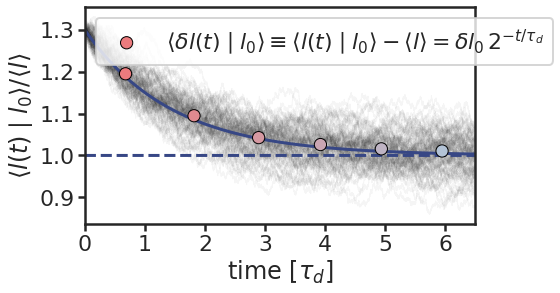

In [39]:
sns.set(style="white")
sns.set_context("poster")

dt = 1/data_frame.iloc[0]['doubling_rate']
string_list = make_list_of_strings_from_a_to_b(0, 99)
cpal = sns.color_palette("mycolormap", n_colors=list_length)

fig, ax = plt.subplots(figsize=(7,4))
df_lipids.plot(x='time', y=string_list, color='black', alpha=0.04, linewidth=1, legend=False, ax=ax)
df_lipids.plot(x='time', y='theory', color=blue, alpha=1, linewidth=3,  ax=ax, legend=False)
df_lipids.plot(x='time', y='steady_state', color=blue,  linewidth=3,  ax=ax, linestyle='--', legend=False)
df_lipid_conc_init.plot.scatter(x='t_init', y='mean', c=cpal, s=150,  ax=ax, edgecolors='black', 
                                linewidth = 1,
                                zorder=10,
                               label=r'$\langle \delta l(t) \mid l_0 \rangle \equiv \langle l(t) \mid l_0 \rangle-\langle l \rangle = \delta l_0 \, 2^{-t/\tau_d}$')
# label=r'$\langle l(t^\ast \mid l_0) \rangle/ \langle l \rangle$', 
ax.set(xlabel=r'time [$\tau_d$]', ylabel=r'$ \langle l(t) \mid l_0 \rangle / \langle l \rangle$')
# ax.set(ylim=(0.4,1.6))
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[1:], labels=labels[1:])
ax.set_xticks([0, dt, 2*dt, 3*dt, 4*dt, 5*dt,  6*dt])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6'])
ax.tick_params(bottom=True, labelbottom=True)
ax.tick_params(which='major', length=7)
ax.tick_params(left=True, labelleft=True)
ax.set_yticks([0.9,1,1.1, 1.2, 1.3])
ax.set_yticklabels([r'0.9', r'1.0', r'1.1', r'1.2', r'1.3'])
# ax.tick_params(axis='x', colors='black')
ax.margins(x=0)
plt.savefig(file_path + '/lipid_conc_relax.pdf', format='pdf', bbox_inches='tight')

# Make data frame of initiation volume

## Theoretical initiation volume 

In [40]:
def return_array_of_v_init(filepath_h5):
    data_frame = pd.read_hdf(filepath_h5, key='dataset_init_events')
    return data_frame['v_init_per_ori']

In [41]:
def calculate_v_init(df, production_rate_lipids):
    return df.destruction_rate_datA / production_rate_lipids * df.frac_init * \
           (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
           ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))-((df.production_rate_dars1+ df.production_rate_dars2)/production_rate_lipids)

df_v_init = pd.DataFrame()
for index, row in data_frame.iterrows():
    v_init_list = list(return_array_of_v_init(row.path_dataset))
#     print(v_init_list)
    df_v_init[str(index)] = v_init_list[:list_length]
df_v_init["mean"] = df_v_init.mean(axis=1)
df_v_init["generation"] = np.arange(0, list_length)

df_v_init["steady_state_v_init_th"] = calculate_v_init(data_frame.iloc[0], 
                                             data_frame["production_rate_lipids"][0] / data_frame["rate_growth"][0])
df_v_init["steady_state_lipids"] = data_frame["production_rate_lipids"][0] / data_frame["rate_growth"][0]
df_v_init["mean_v_init"] = 0.2913334422789667

## Find lipid conc at first initiation volume

In [42]:
df_v_init["theory_lipids"] =(df_v_init["steady_state_lipids"] + (mean_lipid_conc_0- df_v_init["steady_state_lipids"]) /(2**df_v_init["generation"]))

df_v_init["theory_v_init_1"] =  calculate_v_init(data_frame.iloc[0], 
                                             df_v_init["theory_lipids"] )
df_v_init["theory_v_init_2"] =  calculate_v_init(data_frame.iloc[0], 
                                             df_lipid_conc_init["mean"] )

df_v_init["adder"] = (df_v_init["mean"][0]- df_v_init["mean_v_init"])/(2**(df_v_init["generation"]))+ df_v_init["mean_v_init"]

## Plot initiation volume over generations

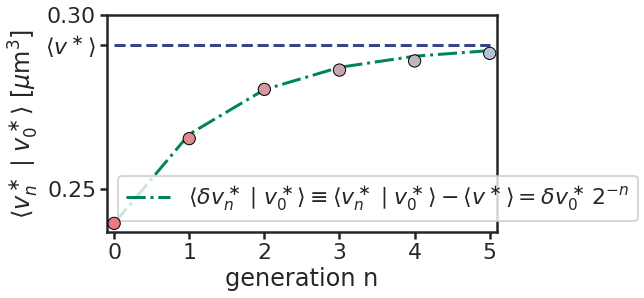

In [43]:
sns.set(style="white")
sns.set_context("poster")

dt = 1/data_frame.iloc[0]['doubling_rate']
string_list = make_list_of_strings_from_a_to_b(0, 99)
string_list = make_list_of_strings_from_a_to_b(0, 99)
cpal = sns.color_palette("mycolormap", n_colors=list_length)

fig, ax = plt.subplots(figsize=(7,4))
# df_v_init.plot(x='generation', y=string_list, color='black', alpha=0.05, linewidth=2, legend=False, ax=ax)
df_v_init.plot.scatter(x='generation', y='mean', color=cpal, alpha=1, linewidth=1,  ax=ax, 
                       s=150,  edgecolors='black', zorder=10)
# df_v_init.plot(x='generation', y='theory_v_init_1', color=blue, alpha=1, linewidth=3,  ax=ax, 
#                label=r'$v^\ast_{\rm th}$ using $l_{\rm th}$')
# df_v_init.plot(x='generation', y='theory_v_init_2', color='red', alpha=1, linewidth=3,  ax=ax, 
#                label=r'$v^\ast_{\rm th}$ using $\langle l \rangle$')
df_v_init.plot(x='generation', y='mean_v_init', color=blue,  linewidth=3,  ax=ax, linestyle='--', legend=False)
df_v_init.plot(x='generation', y='adder', color=green, alpha=1,  ax=ax, linestyle='-.', label=r'$\langle \delta v^\ast_{n} \mid v^\ast_0 \rangle \equiv \langle v^\ast_n \mid v_0^\ast \rangle - \langle v^\ast \rangle = \delta v^\ast_0 \, 2^{-n}$')

ax.set(xlabel=r'generation n', ylabel=r'$\langle v^\ast_n \mid v_0^\ast \rangle$ [$\mu$m$^3$]')
ax.set(xlim=(-0.1,5.1))
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
ax.tick_params(bottom=True, labelbottom=True)
ax.tick_params(which='major', length=7)
ax.tick_params(left=True, labelleft=True)
ax.set_yticks([0.25,df_v_init["mean_v_init"][0], 0.30])
ax.set_yticklabels([r'0.25', r'$\langle v^\ast \rangle$', r'0.30'])
# ax.tick_params(axis='x', colors='black')
plt.savefig(file_path + '/v_init_relax.pdf', format='pdf', bbox_inches='tight')

# Plot functional dependence of initiation volume on lipid conc

In [44]:
df_lipid_conc_abs = pd.DataFrame()
for index, row in data_frame.iterrows():
    lipid_conc_init_list = list(return_array_of_lipid_conc_init(row.path_dataset))
#     print(lipid_conc_init_list)
    df_lipid_conc_abs[str(index)] = lipid_conc_init_list[:list_length]
df_lipid_conc_abs["mean"] = df_lipid_conc_abs.mean(axis=1)
df_lipid_conc_abs["generation"] = np.arange(0, list_length)
df_lipid_conc_abs

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,mean,generation
0,3340.167188,3373.735991,3230.018506,3254.794660,3194.232615,3478.920240,3223.423183,3201.622310,3371.286142,3345.414958,...,3276.024062,3324.027991,3349.965374,3218.319382,3210.581757,3311.611066,3292.313732,3310.964003,3292.338779,0
1,3025.411057,3173.859252,2922.574336,3118.775503,2674.683631,3184.327060,3115.374289,3131.499210,2932.801125,3021.101800,...,3030.085258,2838.890775,2921.613045,3038.686430,2758.825100,3104.068614,2947.049965,2848.466934,3016.236102,1
2,2884.777425,3036.532008,2818.409559,2992.762573,2760.610332,2894.158709,2932.287223,2911.713464,3032.475314,2878.865760,...,2924.715669,2713.524339,2897.637843,2870.165793,2616.451638,2908.192230,2820.509854,2917.111485,2872.185969,2
3,2848.498334,2882.400166,2978.470213,2895.421236,2734.006252,2906.431516,2943.938017,2785.688215,2667.422955,2827.919113,...,2795.975909,2504.600044,2743.001324,2889.019044,2720.315494,3031.216795,2900.089801,2759.118664,2826.593969,3
4,2702.207332,2858.320363,2896.236385,2684.921354,2852.816225,2893.872339,2748.806458,2731.356999,2723.984285,2755.107480,...,2753.488579,2754.687952,2775.748027,2869.096611,2729.879704,3110.961253,2697.800070,2913.875580,2798.384314,4
5,2880.148776,2913.841557,2798.026878,2640.687671,2801.760897,2962.787803,2742.316207,2707.749601,2816.216783,2626.922844,...,2815.886096,2877.906164,2828.200468,3071.211393,2735.200394,2914.303282,2595.526342,2822.154309,2784.292000,5


In [45]:
def calculate_v_init_LDDR(df, production_rate_lipids):
    return df.destruction_rate_datA / production_rate_lipids * df.frac_init * \
           (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
           ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))-((df.production_rate_dars1+ df.production_rate_dars2)/df.production_rate_lipids)

lipid_conc_average = data_frame['production_rate_lipids'][0] / data_frame['rate_growth'][0]
lipid_conc_arr = np.arange(0.935* lipid_conc_average, 1.3* lipid_conc_average, 5)
lipid_conc_init = calculate_v_init_LDDR(data_frame.iloc[0], df_lipid_conc_abs["mean"])
v_init_arr = calculate_v_init_LDDR(data_frame.iloc[0], lipid_conc_arr)
# print(v_init_arr)

6


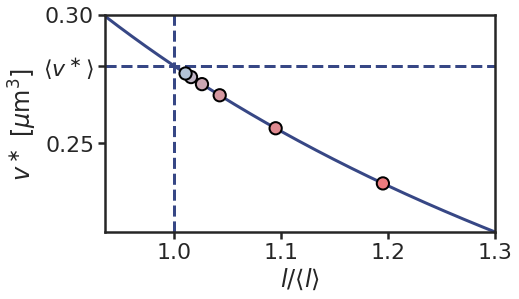

In [46]:
sns.set(style="white")
sns.set_context("poster")
print(len(cpal))
lipid_conc_average = data_frame['production_rate_lipids'][0] / data_frame['rate_growth'][0]
lipid_conc_0 = data_frame['lipid_conc_0'][0]
v_init_average = calculate_v_init_LDDR(data_frame.iloc[0], 
                                       data_frame['production_rate_lipids'][0] / data_frame['rate_growth'][0])
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(lipid_conc_arr, v_init_arr, color=blue)
plt.scatter(df_lipid_conc_abs["mean"], lipid_conc_init, color=cpal,  s=150,  edgecolors='black', zorder=10)
# ax.plot(x='generation', y='mean',  alpha=1, linewidth=1,  ax=ax, label=r'$\langle v^\ast \rangle$', s=150,  edgecolors='black')
ax.axvline(lipid_conc_average, linestyle='--', linewidth=3, color=blue)
ax.axhline(v_init_average,
           linestyle='--', linewidth=3, color=blue)
ax.margins(0)
ax.set(xlim=(np.min(lipid_conc_arr), np.max(lipid_conc_arr)))
# ax.set_xticks([lipid_conc_average])
# ax.set_xticklabels([r'$\langle l \rangle$'])
ax.set_xticks([1* lipid_conc_average, 1.1* lipid_conc_average,1.2* lipid_conc_average,1.3* lipid_conc_average])
ax.set_xticklabels([r'1.0', r'1.1', r'1.2', r'1.3'])
ax.tick_params(bottom=True, labelbottom=True)
ax.tick_params(left=True, labelleft=True)
ax.tick_params(which='major', length=7)
ax.set_yticks([ 0.25,df_v_init["steady_state_v_init_th"][0], 0.30])
ax.set_yticklabels([ r'0.25', r'$\langle v^\ast \rangle$', r'0.30'])
ax.set(xlabel=r'$l / \langle l \rangle$', ylabel=r'$v^\ast$ [$\mu$m$^3$]')
# plt.legend()
plt.savefig(file_path + '/mapping.pdf', format='pdf', bbox_inches='tight')